# Fuel Economy Data Analysis
*- By Maithili Desai*

## Introduction

The files being utilized for analysis are: all_alpha_08.csv and all_alpha_18.csv and can be found [here](https://www.fueleconomy.gov/feg/download.shtml). This information is provided is a result of vehicle testing done by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory. 

## Questions to be answered:
1. Are more unique models using alternative sources of fuel? By how much?
2. How much have vehicle classes improved in fuel economy?
3. What are the characteristics of SmartWay vehicles? Have they changed over time?
4. What features are associated with better fuel economy?
5. For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

## Dataset Overview

- There are two datasets for the year 2008 and 2018.
- 2008 dataset has 18 attributes and 2404 observations
- 2018 dataset has 18 attributes and 1611 observations
- These datasets have the following attributes:

  - **Model:**	Vehicle make and model
  - **Displ:**	Engine displacement (the size of an engine in liters)
  - **Cyl:**	The number of cylinders in a particular engine
  - **Trans:**	Transmission Type and Number of Gears
  - **Drive:**	Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
  - **Fuel:**	Fuel Type
  - **Cert Region*:** Certification Region Code
  - **Sales Area**:**	Certification Region Code
  - **Stnd:** Vehicle emissions standard code
  - **Stnd Description*:**	Vehicle emissions standard description
  - **Underhood ID:**	This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family." This is explained more here
  - **Veh Class:**	EPA Vehicle Class
  - **Air Pollution Score:**	Air pollution score (smog rating)
  - **City MPG:**	Estimated city mpg (miles/gallon)
  - **Hwy MPG:**	Estimated highway mpg (miles/gallon)
  - **Cmb MPG:**	Estimated combined mpg (miles/gallon)
  - **Greenhouse Gas Score:**	Greenhouse gas rating
  - **SmartWay:**	Yes, No, or Elite
  - **Comb CO2*:**	Combined city/highway CO2 tailpipe emissions in grams per mile

*Note:* 
- *Not included in 2008 dataset
- ** Not included in 2018 dataset

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style('darkgrid')

#Load both the dataframes
df_2008= pd.read_csv('all_alpha_08.csv')
df_2018= pd.read_csv('all_alpha_18.csv')

df_2008.head()
df_2018.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Assessing Data

Using pandas to explore these datasets in the Jupyter Notebook below to answer questions about these characteristics of the data:

1. Number of samples in each dataset
2. Number of columns in each dataset
3. Duplicate rows in each dataset
4. Datatypes of columns
5. Features with missing values
6. Number of non-null unique values for features in each dataset
7. What those unique values are and counts for each

In [2]:
# Number of samples and columns in 2008 dataframe
df_2008.shape

(2404, 18)

In [3]:
# Number of samples and columns in 2018 dataframe
df_2018.shape

(1611, 18)

In [4]:
# Duplicate rows in 2008 dataframe
sum(df_2008.duplicated())

25

In [5]:
# Duplicate rows in 2018 dataframe
sum(df_2018.duplicated())

0

In [6]:
# Datatypes of columns in 2008 dataframe
df_2008.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [7]:
# Datatypes of columns in 2018 dataframe
df_2018.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [8]:
# Rows with missing data in 2008 dataframe
df_2008.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [9]:
# Rows with missing data in 2018 dataframe
df_2018.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [10]:
# Number of non-null unique values for features in 2008 dataset
df_2008.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [11]:
# Number of non-null unique values for features in 2018 dataset
df_2018.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [12]:
# Unique values and counts for 2008 Dataframe
df_2008['Fuel'].value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [13]:
# Unique values and counts for 2018 Dataframe
df_2018['Fuel'].value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

## Cleaning Column Labels

### Drop extraneous columns
Dropping features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Pandas' drop function is used.

**Columns to Drop:**
1. From 2008 dataset: `'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'`
2. From 2018 dataset: `'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'`

In [14]:
#Dropping columns in 2008 dataframe
df_2008.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
df_2008.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [15]:
#Dropping columns in 2018 dataframe
df_2018.drop([ 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)
df_2018.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


### Rename Columns
1. Change the `Sales Area` column label in the 2008 dataset to `Cert Region` for consistency.
2. Rename all column labels to replace spaces with underscores and convert everything to lowercase.

In [16]:
# rename Sales Area to Cert Region
df_2008.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

#Confirm change
df_2008.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_2008.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_2008.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [18]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_2018.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_2018.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [19]:
# confirm column labels for 2008 and 2018 datasets are identical
(df_2008.columns == df_2018.columns).all()

True

## Filter, Drop Nulls, Dedupe

### 1. Filter
For consistency, only comparing cars certified by California standards. Filtering both datasets using query to select only rows where `cert_region` is `CA`. Then, dropping the `cert_region` columns, since it will no longer provide any useful information.

In [20]:
# filter datasets for rows following California standards
df_2008 = df_2008.query('cert_region=="CA"')
df_2018 = df_2018.query('cert_region=="CA"')

In [21]:
# confirm only certification region is California
df_2008['cert_region'].unique()

array(['CA'], dtype=object)

In [22]:
# confirm only certification region is California
df_2018['cert_region'].unique()

array(['CA'], dtype=object)

In [23]:
# drop certification region columns form both datasets
df_2008.drop('cert_region', axis=1, inplace=True)
df_2018.drop('cert_region', axis=1, inplace=True)

df_2008.shape

(1084, 13)

In [24]:
df_2018.shape

(798, 13)

### 2. Drop Nulls
Drop any rows in both datasets that contain missing values.

In [25]:
# view missing value count for each feature in 2008
df_2008.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [26]:
# view missing value count for each feature in 2018
df_2018.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [27]:
# drop rows with any null values in both datasets
df_2008.dropna(inplace=True)
df_2018.dropna(inplace=True)

In [28]:
# checks if any of columns in 2008 have null values - should print False
df_2008.isnull().sum().any()

False

In [29]:
# checks if any of columns in 2018 have null values - should print False
df_2018.isnull().sum().any()

False

### 3. Dedupe
Drop any duplicate rows in both datasets.

In [30]:
# print number of duplicates in 2008 and 2018 datasets
print(df_2008.duplicated().sum())
print(df_2018.duplicated().sum())

23
3


In [31]:
# drop duplicates in both datasets
df_2008.drop_duplicates(inplace=True)
df_2018.drop_duplicates(inplace=True)

In [32]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_2008.duplicated().sum())
print(df_2018.duplicated().sum())

0
0


## Inspecting Data Types

Inspecting the datatypes of features in each dataset to make them practical and consistent

In [33]:
#Datatypes of 2008 dataset
df_2008.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [34]:
#Datatypes of 2018 dataset
df_2018.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Fix cyl datatype
2008: extract int from string.
2018: convert float to int.

In [35]:
# check value counts for the 2008 cyl column
df_2008['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [36]:
# Extract int from strings in the 2008 cyl column
df_2008['cyl'] = df_2008['cyl'].str.extract('(\d+)').astype(int)

In [37]:
# Check value counts for 2008 cyl column again to confirm the change
df_2008['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [38]:
# convert 2018 cyl column to int
df_2018['cyl'] = df_2018['cyl'].astype(int)

### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [39]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
#df_20008.air_pollution_score = df_2008.air_pollution_score.astype(float)

### Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [40]:
df_2008[df_2008.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings. According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation of this dataset:

> _"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."_
    
So all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [41]:
# First, let's get all the hybrids in 2008
hb_2008 = df_2008[df_2008['fuel'].str.contains('/')]
hb_2008

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset only has one.

In [42]:
# hybrids in 2018
hb_2018 = df_2018[df_2018['fuel'].str.contains('/')]
hb_2018

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


I am going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Separating them with two dataframes.

In [43]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_2008.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_2008.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [44]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [45]:
# this dataframe holds info for the FIRST fuel type of the hybrid
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [46]:
# this dataframe holds info for the SECOND fuel type of the hybrid
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [47]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [48]:
# drop the original hybrid rows
df_2008.drop(hb_2008.index, inplace=True)

# add in our newly separated rows
df_2008 = df_2008.append(new_rows, ignore_index=True)

In [49]:
# check that all the original hybrid rows with "/"s are gone
df_2008[df_2008['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [50]:
df_2008.shape

(987, 13)

## Repeating this process for the 2018 dataset

In [51]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_2018.copy()
df2 = hb_2018.copy()

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [52]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [53]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_2018.drop(hb_2018.index, inplace=True)

# append new_rows to df_18
df_2018 = df_2018.append(new_rows, ignore_index=True)

In [54]:
# check that they're gone
df_2018[df_2018['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [55]:
df_2018.shape

(832, 13)

### Continuing the changes needed for `air_pollution_score`:
- 2008: convert string to float
- 2018: convert int to float

In [56]:
# convert string to float for 2008 air pollution column
df_2008.air_pollution_score = df_2008.air_pollution_score.astype(float)

In [57]:
# convert int to float for 2018 air pollution column
df_2018.air_pollution_score = df_2018.air_pollution_score.astype(float)

### Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [58]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_2018[c] = df_2018[c].astype(float)
    df_2008[c] = df_2008[c].astype(float)

### Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [59]:
# convert from float to int
df_2008['greenhouse_gas_score'] = df_2008['greenhouse_gas_score'].astype(np.int64)

### All the dataypes are now fixed. Confirming all the changes.

In [60]:
df_2008.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [61]:
df_2018.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [62]:
df_2008.dtypes == df_2018.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [63]:
# Save final CLEAN datasets as new files
df_2008.to_csv('clean_08.csv', index=False)
df_2018.to_csv('clean_18.csv', index=False)

## Exploring with Visuals
Use histograms and scatterplots to explore `clean_08.csv` and `clean_18.csv` in the Jupyter notebook.

In [64]:
#Loading datasets
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

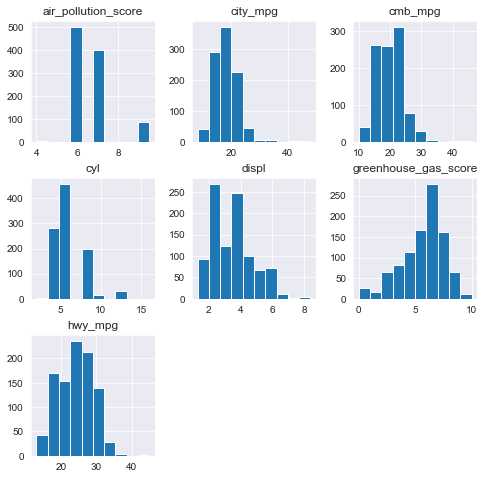

In [65]:
# Distribution of features of 2008 dataframe 
df_08.hist(figsize=(8,8));

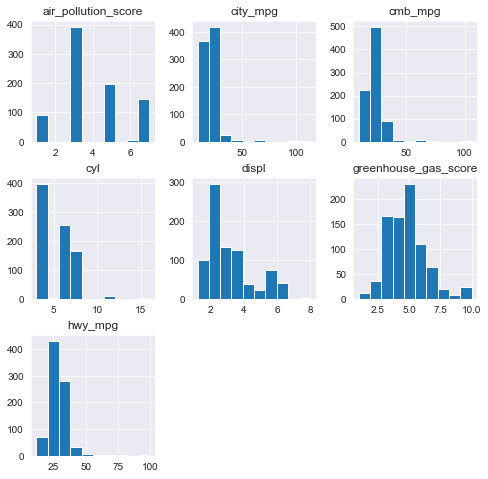

In [66]:
# Distribution of features of 2018 dataframe 
df_18.hist(figsize=(8,8));

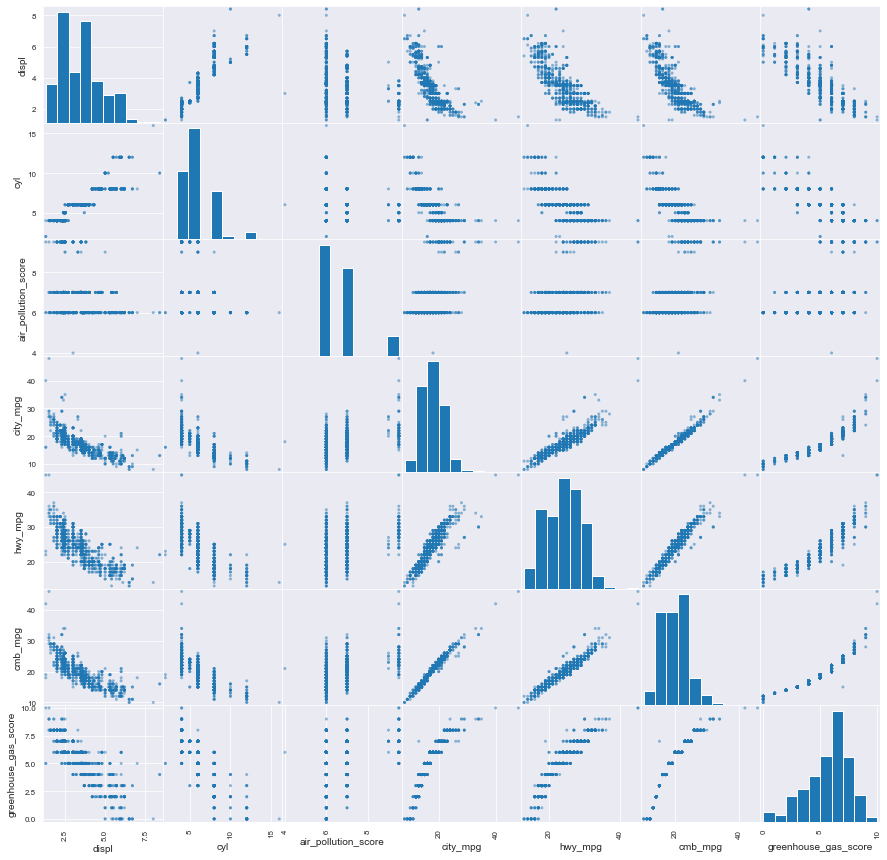

In [67]:
#Correlation among features in 2008 dataset
pd.plotting.scatter_matrix(df_08,figsize=(15,15));

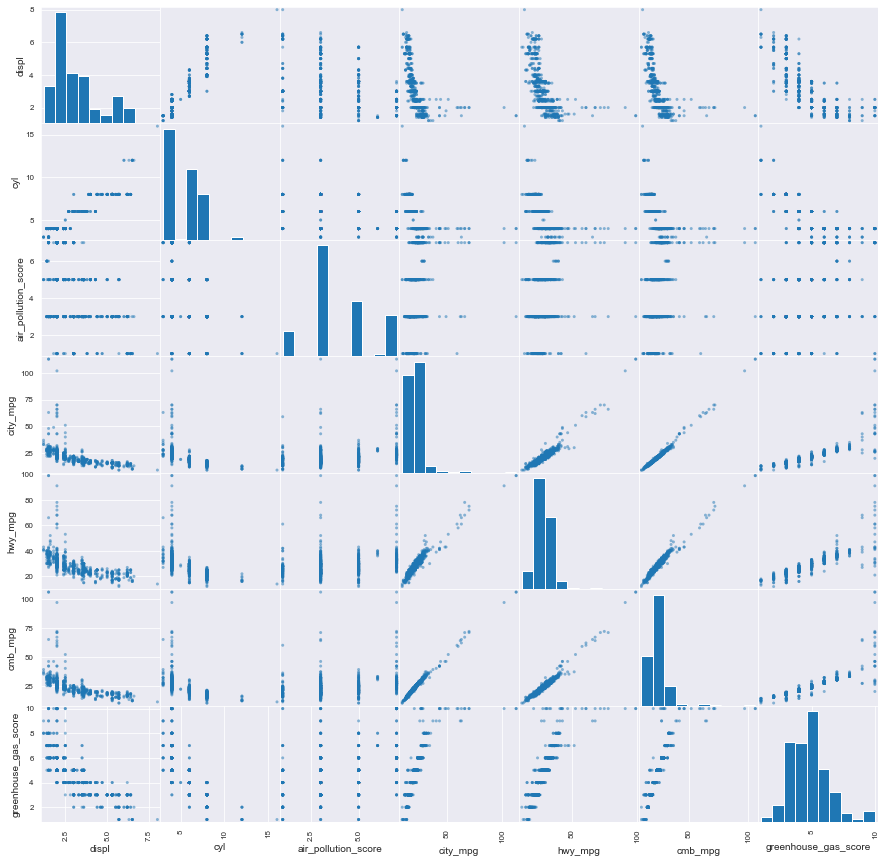

In [68]:
#Correlation among features in 2018 dataset
pd.plotting.scatter_matrix(df_18,figsize=(15,15));

# Drawing Conclusions

In [69]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


### Q1: Are more unique models using alternative sources of fuel? By how much?

To answer this, I'll first look at what the sources of fuel are and which ones are alternative sources.

In [70]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [71]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

**Available alternative sources of fuel:**
- 2008: CNG and ethanol
- 2018: ethanol and electricity

In [72]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in["ethanol","CNG"]').model.nunique()
alt_08

2

In [73]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol","Electricity"]').model.nunique()
alt_18

26

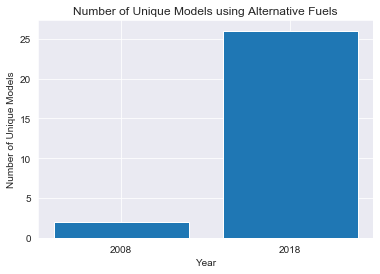

In [74]:
#Plotting bar graph of the counts
plt.bar(["2008","2018"],[alt_08, alt_18])
plt.title('Number of Unique Models using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

**Insight:**
Since 2008, the number of unique models using alternative sources of fuel increased by 24. I'll also look at the proportions.

In [75]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [76]:
# Proportions
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

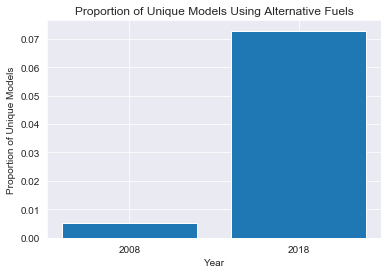

In [77]:
#Plotting bar graph of the proportions
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

**Insight**: Thus the proportions are 0.0053 for 2008 and 0.072 for 2018

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [78]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [79]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [80]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

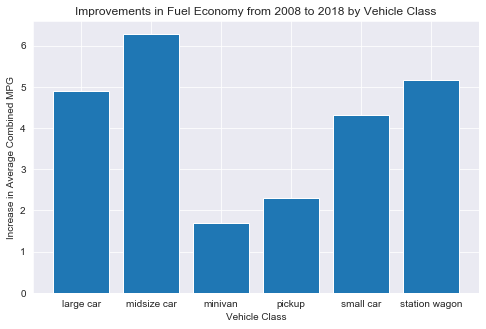

In [81]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)

plt.subplots(figsize=(8,5))
plt.bar(inc.index,inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

**Insight:**
- Midsize cars have improved the most in fuel economy from 2008 to 2018 by 6.28 combined mpg
- The least improvement is shown by mini vans which is 1.68 combined mpg

## Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

This question can be analyzed by filtering each dataframe by SmartWay classification and exploring these datasets.

In [82]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [83]:
# get all smartway vehicles in 2008 and explore
df_08.query('smartway == "yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [84]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [85]:
# get all smartway vehicles in 2018 and explore
df_18.query('smartway in ["Yes","Elite"]').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


**Insight:**

From the descriptive statistics we can notice that:
- There were more SmartWay vehicles in 2008 than in 2018
- The mean has increased from 2008 to 2018 for city mpg, highway mpg, combined mpg showing drastic improvement in mileage
- For the rest of the characteristics like engine size, air pollution score and green house gas score, the average is lower in 2018
- This means that over time the engine size has descreased increasing the mileage and lowering pollution caused by the vehicles which is assessed using air pollution score and green house gas score in this dataset

## Q4: What features are associated with better fuel economy?

Selecting all vehicles that have the top 50% fuel economy ratings to compare the features

In [86]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


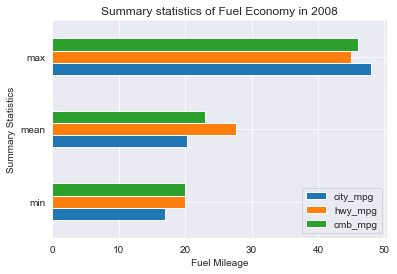

In [87]:
desc_08 = top_08.describe().loc[['min','mean', 'max']]
ax = desc_08.iloc[: ,3:6].plot(kind='barh')
ax.set(xlabel = 'Fuel Mileage', ylabel='Summary Statistics', title='Summary statistics of Fuel Economy in 2008');

In [88]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


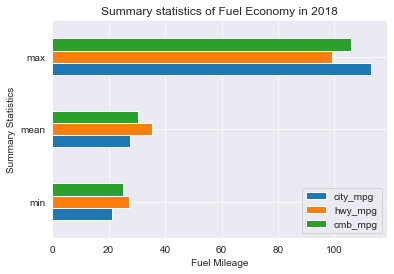

In [89]:
desc_18 = top_18.describe().loc[['min','mean', 'max']]
ax = desc_18.iloc[: ,3:6].plot(kind='barh');
ax.set(xlabel = 'Fuel Mileage', ylabel='Summary Statistics', title='Summary statistics of Fuel Economy in 2018');

**Insights:**
- The minimum, maximum and average mileage for city, highway and combined has increased from 2008 to 2018 
- This is also reflected in low air pollution and greenhouse gas score

The above combination of statistics suggest a better fuel ecomomy

## Merging Datasets
### Create combined dataset

1. Rename 2008 columns to distinguish from 2018 columns after the merge
  - I'll rename the columns by utilizing only the first 10 characters of the column label (to prevent really long column name) and and concatenate it with `_2008`

In [90]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[ :10] + "_2008", inplace=True)

In [91]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


2. Perform inner merge
  - To answer the last question, I am interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.
  - Performing an inner merge with the left on `model_2008` and the right on `model`.

In [92]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [93]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


Save the combined dataset

In [94]:
df_combined.to_csv('combined_dataset.csv', index=False)

## Results with Merged Dataset
### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?
In order to do this, we need a way to compare models that exist in both datasets. Using the new dataset created above, `combined_dataset.csv`

In [95]:
# load dataset
df = pd.read_csv('combined_dataset.csv')

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [96]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [97]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [98]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [99]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


**Insight**: Thus, the model improved which has improved the most from 2008 to 2018 is VOLVO XC 90 and the improvement is 16.53 mpg.

The above code can be optimized further to get the answer with less code. Pandas also has a useful [`idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) function that can be used to find the index of the row containing a column's maximum value

In [100]:
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [101]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64

This shows that the combined mpg was 15.6 in 2008 and increased to 32.2 in 2018 which gives a max change of 16.53.

## Conclusion:
Thus, I have assessed, cleaned and explored this dataset to draw conclusions about the following questions:

**1. Are more unique models using alternative sources of fuel? By how much?**
   - Available alternative sources of fuel are CNG and ethanol in 2008 and ethanol and electricity in 2018
   - The proportions are 0.0053 for 2008 and 0.072 for 2018
   
**2. How much have vehicle classes improved in fuel economy?**
   - Midsize cars have improved the most in fuel economy from 2008 to 2018 by 6.28 combined mpg
   - Least improvement is shown by mini vans which is 1.68 combined mpg
   
**3. What are the characteristics of SmartWay vehicles? Have they changed over time?**
   - The mean has increased from 2008 to 2018 for city mpg, highway mpg, combined mpg showing drastic improvement in mileage
   - For the rest of the characteristics like engine size, air pollution score and green house gas score, the average is lower in 2018
   - This means that over time the engine size has descreased increasing the mileage and lowering pollution caused by the vehicles which is assessed using air pollution score and green house gas score in this dataset
    
**4. What features are associated with better fuel economy?**
   - The minimum, maximum and average mileage for city, highway and combined has increased from 2008 to 2018
   -  This is also reflected in low air pollution and greenhouse gas score

The above combination of statistics suggest a better fuel ecomomy

**5. For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?**
   - The model improved which has improved the most from 2008 to 2018 is VOLVO XC 90 and the improvement is 16.53 mpg